<a href="https://colab.research.google.com/github/Dhanush-Poduval/spamdetection_model/blob/main/spamDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install langdetect
!pip install wordcloud




In [41]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url ,sep='\t',header=None ,  names=['labels','messages'])
df.head(5)

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df.isna().sum()


,0
labels,0
messages,0


In [62]:
import langdetect
def get_lang(text):
  try:
    return langdetect.detect(text)
  except:
    return "uknown"
df["lang"]=df["messages"].apply(get_lang)

<Axes: xlabel='lang'>

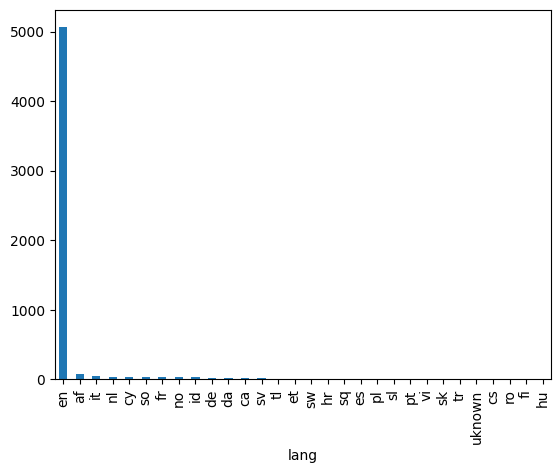

In [63]:


df["lang"].value_counts().plot(kind='bar')

In [85]:
pos=df[df['lang']!='en'].index
only_eng=df.drop(index=pos)
only_eng["lang"].unique()

array(['en'], dtype=object)

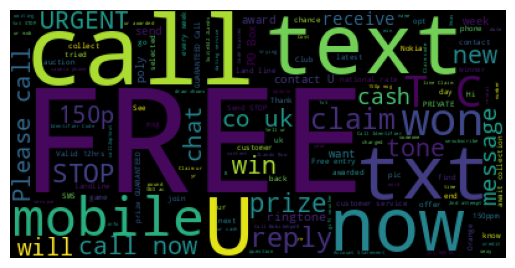

In [87]:
def generate_wordcloud(text):
  from wordcloud import WordCloud , STOPWORDS
  import matplotlib.pyplot as plt
  wordcloud=WordCloud(stopwords=STOPWORDS , background_color='black').generate(text)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

spam = only_eng[only_eng['labels']=='spam']
all_spam = " ".join(spam["messages"])
generate_wordcloud(all_spam)

<Axes: xlabel='labels'>

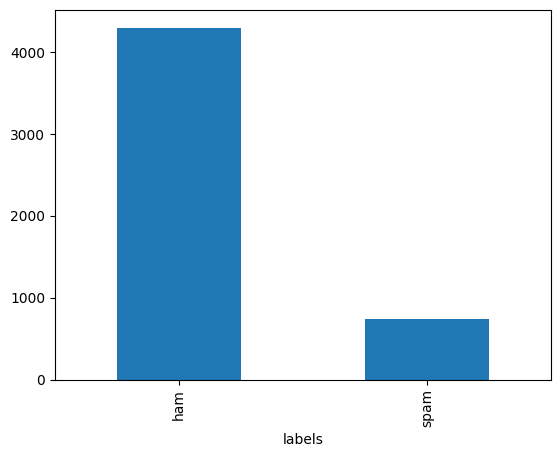

In [47]:
only_eng["labels"].value_counts().plot(kind='bar')

In [73]:
only_eng['labels'].unique()
only_eng.head()


,labels,messages,lang
0,0,"Go until jurong point, crazy.. Available only ...",en
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,en
3,0,U dun say so early hor... U c already then say...,en
4,0,"Nah I don't think he goes to usf, he lives aro...",en
5,1,FreeMsg Hey there darling it's been 3 week's n...,en


In [88]:
only_eng['labels']=only_eng['labels'].apply(lambda x : 1 if x=='spam' else 0)
only_eng.head()

,labels,messages,lang
0,0,"Go until jurong point, crazy.. Available only ...",en
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,en
3,0,U dun say so early hor... U c already then say...,en
4,0,"Nah I don't think he goes to usf, he lives aro...",en
5,1,FreeMsg Hey there darling it's been 3 week's n...,en


In [89]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(only_eng['messages'], only_eng['labels'],test_size=0.2)

In [90]:
#using tfid vectorizer for stuff like charecters and text
from sklearn.feature_extraction.text import TfidfVectorizer
lst =x_train.tolist()
vectorizer=TfidfVectorizer(
    lowercase=True,
    stop_words='english'
)
feature_train_transform=vectorizer.fit_transform(lst)#this converts every like value to a array of numbers so yea for traning its perfect
feature_test_transform=vectorizer.transform(x_test)#use transform here so that the string converts to the trfid numerical format and maps over the trained set i think

In [91]:
from sklearn.naive_bayes import MultinomialNB
model =MultinomialNB()
model.fit(feature_train_transform,y_train)
print(model.score(feature_test_transform, y_test) * 100)

97.4308300395257


In [102]:

my_msgs = [
    "Download this file to claim your reward.",
    "Hey, are we still meeting for lunch tomorrow?"
]


my_msgs_transformed = vectorizer.transform(my_msgs)


predictions = model.predict(my_msgs_transformed)
for msg, pred in zip(my_msgs, predictions):
    print(f"Message: {msg}")
    print("Spam" if pred == 1 else "Ham", "\n")


Message: Download this file to claim your reward.
Spam 

Message: Hey, are we still meeting for lunch tomorrow?
Ham 



In [103]:
import joblib

joblib.dump(model, 'spam_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [104]:
from google.colab import files

files.download('spam_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>